# Exploratory Data Analysis of Wealth Tax in French Communes

## An initial analysis of ISF and IFI across communes in France

### Summary

This notebook aims to explore the distribution of wealth, as represented by the Impôt de solidarité sur la fortune (ISF) and Impôt sur la fortune immobilière (IFI), across different communes in France. We will also attempt some preliminary predictions for the next 5 years.

### Table of Contents

1. [Data Import and Cleaning](#Data-Import-and-Cleaning)
2. [Exploratory Data Analysis](#Exploratory-Data-Analysis)
3. [Preliminary Predictions](#Preliminary-Predictions)
4. [Conclusion](#Conclusion)

### Metadata

- Author: [Santiago Patino](https://www.linkedin.com/in/santiago-patino/) - CEO of [Godi.AI](https://www.godi.ai)
- Creation Date: 2023-09-15
- Last Modified: 2023-09-15
- Data Source: [Impôt de solidarité sur la fortune - Impôt sur la fortune immobilière par collectivité territoriale](https://www.data.gouv.fr/fr/datasets/impot-de-solidarite-sur-la-fortune-impot-sur-la-fortune-immobiliere-par-collectivite-territoriale/)


# Basic setting

In [242]:
#Requirements.txt
#pandas
#openpyxl
#xlrd

In [243]:
# Importing required libraries
import pandas as pd 
import os


#Dtypes selecting 

In [244]:
# Define the sample file and path
example_file='\ificom-2022.xlsx'
path=r'G:\Mi unidad\Godi.AI\Operations\Freelancer\Projets\Impots sur la fortune\5YearFrenchWealthAnalysis\DataIn'

# Read a sample of the Excel file, setting all columns initially as string
df_temp = pd.read_excel(path+ example_file, header=0, skiprows=1, nrows=100, dtype=str)

In [245]:
# Inspect the data to decide appropriate data types
df_temp.sample(5)

,Région,Départements,Code commune (INSEE),Commune,nombre de redevables,patrimoine moyen en €,impôt moyen en €
54,ILE-DE-FRANCE,HAUTS-DE-SEINE,92 046,MALAKOFF,88,2339674,9523
48,GRAND-EST,HAUT-RHIN,68 066,COLMAR,94,2376246,11295
84,PROVENCE-ALPES-COTE D'AZUR,ALPES-MARITIMES,06 088,NICE,1336,2271328,9809
78,PAYS DE LA LOIRE,LOIRE-ATLANTIQUE,44 184,ST NAZAIRE,71,2284011,9248
43,PAYS DE LA LOIRE,MAYENNE,53 130,LAVAL,80,2396354,10426


In [246]:
# Define dtype_dict: Data Types for DataFrame Columns
dtype_dict = {
    'Région': str,  # Categorical data
    'Départements': str,  # Categorical data
    'Code commune (INSEE)': str,  # Identifier; non-numeric
    'Commune': str,  # Categorical data
    'nombre de redevables': int,  # Count; integer
    'patrimoine moyen en €': int,  # Monetary; integer
    'impôt moyen en €': int,  # Monetary; integer
    "patrimoine moyen en millions d'euros": float,  # Monetary in millions; float
    "impôt moyen en milliers d'euros": float,  # Monetary in thousands; float
}

# Reading all files 

Scans the specified directory for files with a prefix of 'ificom' and reads them into
a single DataFrame using predefined data types specified in dtype_dict.

In [247]:
# List all files in the folder
all_files = os.listdir(path)

# Filter files that start with 'ificom'
ificom_files = [f for f in all_files if f.startswith('ificom')]

# Initialize an empty DataFrame to hold all the data
df_ificom = pd.DataFrame()

# Read each file and append it to all_data
for file in ificom_files:
    df_temp = pd.read_excel(os.path.join(path, file), header=0, skiprows=1, dtype=dtype_dict)
    
    # Add a new column with the filename
    df_temp['filename'] = file
    
    df_ificom = pd.concat([df_ificom, df_temp], ignore_index=True)

In [248]:
df_ificom.sample(4)

,Région,Départements,Code commune (INSEE),Commune,nombre de redevables,patrimoine moyen en €,impôt moyen en €,filename,Département,Code de la commune (INSEE),Nom de la commune,Nombre de redevables,Patrimoine moyen en €,Impôt moyen en €,patrimoine moyen en millions d'euros,impôt moyen en milliers d'euros
753,OCCITANIE,HERAULT,34 057,CASTELNAU LE LEZ,97.0,NaN,NaN,ificom-2020.xlsx,NaN,NaN,NaN,NaN,NaN,NaN,2.199451,9.426
696,ILE-DE-FRANCE,VAL-DE-MARNE,94 046,MAISONS-ALFORT,118.0,NaN,NaN,ificom-2020.xlsx,NaN,NaN,NaN,NaN,NaN,NaN,2.113140,8.178
373,PROVENCE-ALPES-COTE D'AZUR,VAR,83 129,SIX-FOURS-LES-PLAGES,137.0,2100343.0,8070.0,ificom-2022.xlsx,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
588,OCCITANIE,NaN,NaN,NaN,NaN,NaN,NaN,ificom-2019.xls,TARN-ET-GARONNE,82121,MONTAUBAN,70.0,1940250.0,6901.0,NaN,NaN


### INITIAL DATA CLEANING
Before diving into in-depth analysis or visualization, our first task is to
perform an initial round of data cleaning. This is crucial for ensuring that
we can work seamlessly with the data across various datasets that we've 
collated into a single DataFrame, df_ificom.

In [249]:
# Due to inconsistencies in column naming, especially in the 2019 ificom dataset, 
# we need to harmonize the column names by moving data from alternate columns to 
# the primary columns, if the primary columns have NaN values.

# Harmonize 'Départements'
df_ificom.loc[df_ificom['Départements'].isna(), 'Départements'] = df_ificom['Département']

# Harmonize 'Code commune (INSEE)'
df_ificom.loc[df_ificom['Code commune (INSEE)'].isna(), 'Code commune (INSEE)'] = df_ificom['Code de la commune (INSEE)']

# Harmonize 'Commune'
df_ificom.loc[df_ificom['Commune'].isna(), 'Commune'] = df_ificom['Nom de la commune']

# Harmonize 'nombre de redevables'
df_ificom.loc[df_ificom['nombre de redevables'].isna(), 'nombre de redevables'] = df_ificom['Nombre de redevables']

# Harmonize 'patrimoine moyen en €'
df_ificom.loc[df_ificom['patrimoine moyen en €'].isna(), 'patrimoine moyen en €'] = df_ificom['Patrimoine moyen en €']

# Harmonize 'impôt moyen en €'
df_ificom.loc[df_ificom['impôt moyen en €'].isna(), 'impôt moyen en €'] = df_ificom['Impôt moyen en €']

# Drop redundant columns
redundant_columns = ['Département', 'Code de la commune (INSEE)', 'Nom de la commune', 
                     'Nombre de redevables', 'Patrimoine moyen en €', 'Impôt moyen en €']
df_ificom.drop(columns=redundant_columns, axis=1, inplace=True)


In [250]:
# UNIT CONVERSION AND COLUMN CLEANUP
# Updates 'patrimoine moyen en €' and 'impôt moyen en €' based on available alternate units,
# and removes redundant columns.

# Update 'patrimoine moyen en €' based on available values in 'patrimoine moyen en millions d'euros'
mask_for_patrimoine = pd.notna(df_ificom['patrimoine moyen en millions d\'euros'])
df_ificom.loc[mask_for_patrimoine, 'patrimoine moyen en €'] = df_ificom.loc[mask_for_patrimoine, 'patrimoine moyen en millions d\'euros'] * 1_000_000

# Update 'impôt moyen en €' based on available values in 'impôt moyen en milliers d'euros'
mask_for_impot = pd.notna(df_ificom['impôt moyen en milliers d\'euros'])
df_ificom.loc[mask_for_impot, 'impôt moyen en €'] = df_ificom.loc[mask_for_impot, 'impôt moyen en milliers d\'euros'] * 1_000

# Drop the redundant columns
df_ificom.drop(['patrimoine moyen en millions d\'euros', 'impôt moyen en milliers d\'euros'], axis=1, inplace=True)

In [251]:
# YEAR EXTRACTION FROM FILENAME
# Extract the year information from the 'filename' column and convert it to a numeric type.

# Extract the year from the filename and add it as a new column
df_ificom['year'] = df_ificom['filename'].apply(lambda x: x.split('-')[-1].split('.')[0] if '-' in x else x[-8:-5])
df_ificom['year'] = pd.to_numeric(df_ificom['year'], errors='coerce')

In [252]:
# Column Renaming for Enhanced Readability and Standardization

df_ificom.rename(columns={'Région': 'Region', 'Départements': 'Department', 'Code commune (INSEE)': 'Commune_Code_INSEE', 'Commune': 'City',
                          'nombre de redevables': 'Number_of_Taxpayers', 'patrimoine moyen en €': 'Average_Assets_in_Euro',
                          'impôt moyen en €': 'Average_Tax_in_Euro', 'filename': 'Source_File', 'year': 'Year'}, inplace=True)

# BASIC DATA ANALYSIS AND VISUALIZATION 
(Pre-Cleaning Inside Data)


#### Record Distribution Across Regions, Departments, and Cities

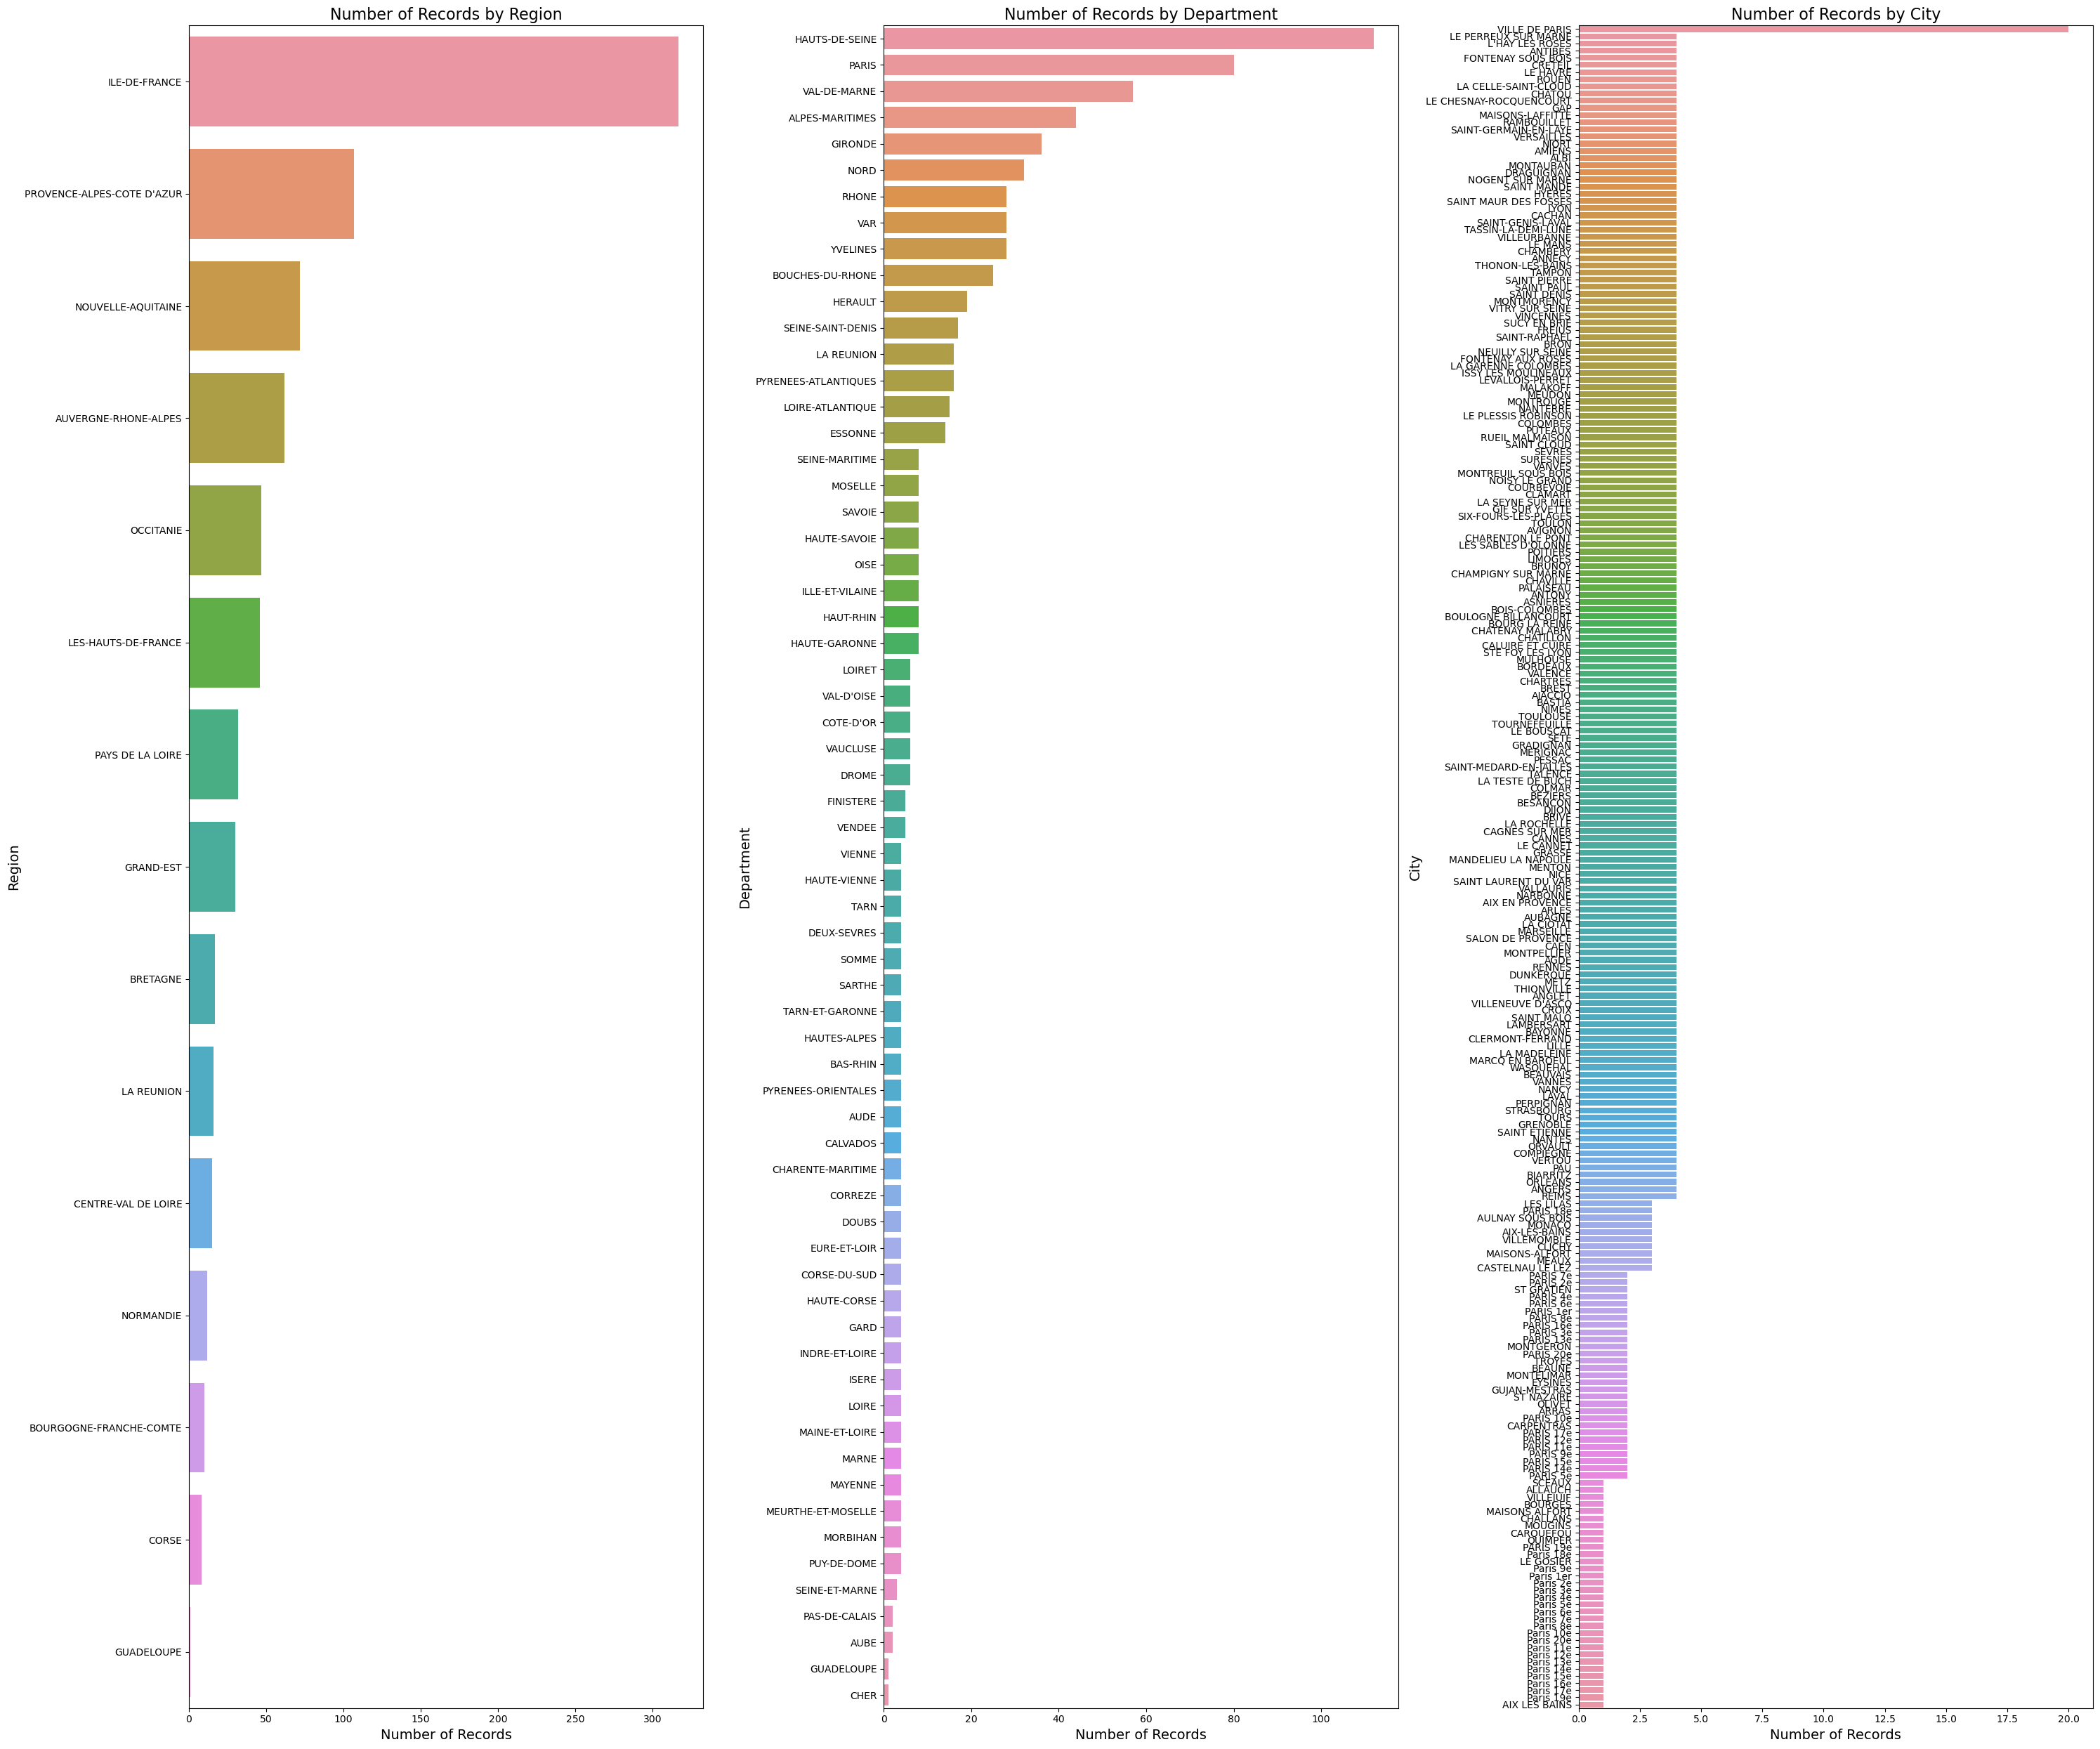

In [253]:
#Visualizing Record Distribution Across Regions, Departments, and Cities
# 
# 
# Import required libraries
import matplotlib.pyplot as plt
import seaborn as sns

# Function to plot category distribution
def plot_category_distribution(ax, df, column):
    sns.countplot(y=column, data=df, ax=ax, order=df[column].value_counts().index)
    ax.set_title(f'Number of Records by {column}', fontsize=16)
    ax.set_xlabel('Number of Records', fontsize=14)
    ax.set_ylabel(column, fontsize=14)

# Initialize figure and subplots
fig, axes = plt.subplots(1, 3, figsize=(30, 25))

# Categories to be plotted
categories = ['Region', 'Department', 'City']

# Generate plots
for ax, category in zip(axes, categories):
    plot_category_distribution(ax, df_ificom, category)

# Adjust layout to avoid overlaps
plt.tight_layout()

# Display the plots
plt.show()

    ##### Analysis ↑: 
    Regarding the 'Regions' and 'Departments', there doesn't appear to be any issue with this visualization. However, concerning the 'Cities', a potential inconsistency is observed. For instance, both 'VILLE DE PARIS' and various arrondissements like 'Paris 15e' are present, which may suggest a data inconsistency. Further investigation is required by checking the INSEE codes for each city to validate this hypothesis.



In [254]:
# Verify potential inconsistencies in INSEE codes for 'VILLE DE PARIS'

# Extract and list INSEE codes for specific city districts
ville_de_paris_codes = df_ificom[df_ificom['City'] == 'VILLE DE PARIS']['Commune_Code_INSEE'].tolist()
paris_18e_codes = df_ificom[df_ificom['City'] == 'Paris 18e']['Commune_Code_INSEE'].tolist()
paris_17e_codes = df_ificom[df_ificom['City'] == 'Paris 17e']['Commune_Code_INSEE'].tolist()

# Output the INSEE codes for verification
print(f"INSEE Codes for 'VILLE DE PARIS': {ville_de_paris_codes}")
print(f"INSEE Codes for 'Paris 18e': {paris_18e_codes}")
print(f"INSEE Codes for 'Paris 17e': {paris_17e_codes}")

INSEE Codes for 'VILLE DE PARIS': [75107, 75108, 75106, 75116, 75104, 75101, 75103, 75118, 75102, 75117, 75105, 75114, 75109, 75115, 75112, 75119, 75113, 75111, 75110, 75120]
INSEE Codes for 'Paris 18e': ['75 118']
INSEE Codes for 'Paris 17e': ['75 117']


    ##### Analysis ↑: 
    This analysis revealed inconsistencies in certain INSEE Codes. For instance, the 17th arrondissement of Paris has varying code formats—sometimes it's '75 117' and other times it's '75117', with or without a space in between. Therefore, data cleaning is required to remove the spaces, followed by standardizing the city name (e.g., either 'VILLE DE PARIS' or 'Paris 17e').

    #### CLEANING Commune_Code_INSEE:

In [255]:
# Remove spaces and convert 'Commune_Code_INSEE' to string
df_ificom['Commune_Code_INSEE'] = df_ificom['Commune_Code_INSEE'].astype(str).str.replace(' ', '', regex=False)

    #### CLEANING city:

In [257]:
# Filter and sort INSEE codes with multiple 'City' names for manual review
grouped = df_ificom.groupby('Commune_Code_INSEE').filter(lambda x: x['City'].nunique() > 1).drop_duplicates(subset=['Commune_Code_INSEE', 'City']).sort_values('Commune_Code_INSEE')

# Log unique codes requiring review
print(f"Unique codes requiring review: {grouped['Commune_Code_INSEE'].nunique()}")

# Add placeholder for final city name and export to Excel
grouped['Final_City'] = ''
grouped.to_excel(r'G:\Mi unidad\Godi.AI\Operations\Freelancer\Projets\Impots sur la fortune\5YearFrenchWealthAnalysis\DataOut\unique_grouped_sorted.xlsx', index=False)


Unique codes requiring review: 22


In [236]:
#Reading cleaned file
unique_grouped_sorted=pd.read_excel(r'G:\Mi unidad\Godi.AI\Operations\Freelancer\Projets\Impots sur la fortune\5YearFrenchWealthAnalysis\DataIn\unique_grouped_sorted.xlsx',dtype=str)
unique_grouped_sorted=unique_grouped_sorted[['Commune_Code_INSEE','Final_City']].drop_duplicates()

#Writing the good city names in the df_ificom

# Assuming that unique_grouped_sorted is your DataFrame that contains the "Final_City"
merged_df = df_ificom.merge(unique_grouped_sorted[['Commune_Code_INSEE', 'Final_City']], on='Commune_Code_INSEE', how='left')

# Update the 'City' column only when 'Final_City' is available
merged_df.loc[~merged_df['Final_City'].isna(), 'City'] = merged_df.loc[~merged_df['Final_City'].isna(), 'Final_City']

# You can now drop the 'Final_City' column if you no longer need it
merged_df.drop(columns=['Final_City'], inplace=True)

# Update your original DataFrame
df_ificom = merged_df
del merged_df

In [259]:
# Load unique INSEE codes and final city names
unique_grouped_sorted = pd.read_excel(r'G:\Mi unidad\Godi.AI\Operations\Freelancer\Projets\Impots sur la fortune\5YearFrenchWealthAnalysis\DataIn\unique_grouped_sorted.xlsx', dtype=str).loc[:, ['Commune_Code_INSEE', 'Final_City']].drop_duplicates()

# Merge and update 'City' in original DataFrame
merged_df = df_ificom.merge(unique_grouped_sorted, on='Commune_Code_INSEE', how='left')
merged_df.loc[~merged_df['Final_City'].isna(), 'City'] = merged_df['Final_City']
df_ificom = merged_df.drop(columns=['Final_City'])


In [ ]:
#IDEAS TO CONTINU WOKRING

#Graphi visually the data 
#Clean values if necesary
#Create a new column with the total of the tax payed by the city

#how to mix this with total population per city?  average rich per 1000 people?